Classification

Accuracy: 0.8333333333333334


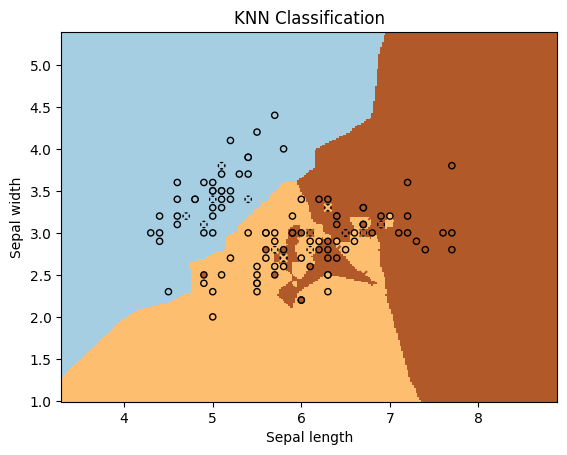

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import datasets
import warnings
warnings.filterwarnings('ignore')

iris=datasets.load_iris()
x=iris.data[:, :2]
y=iris.target
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=42)
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
y_pred=knn.predict(x_test)
accuracy=accuracy_score(y_test, y_pred)
print("Accuracy:",accuracy)
h=.02
x_min, x_max=x[:, 0].min()-1, x[:, 0].max()+1
y_min, y_max=x[:, 1].min()-1, x[:, 1].max()+1
xx, yy=np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
z=knn.predict(np.c_[xx.ravel(), yy.ravel()])
z=z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, z, cmap=plt.cm.Paired)
plt.scatter(x_train[:,0],x_train[:,1],c=y_train,cmap=plt.cm.Paired, edgecolor='k', s=20)
plt.scatter(x_test[:,0],x_test[:,1],c=y_test,cmap=plt.cm.Paired, edgecolor='k', s=30, marker='x')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('KNN Classification')
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


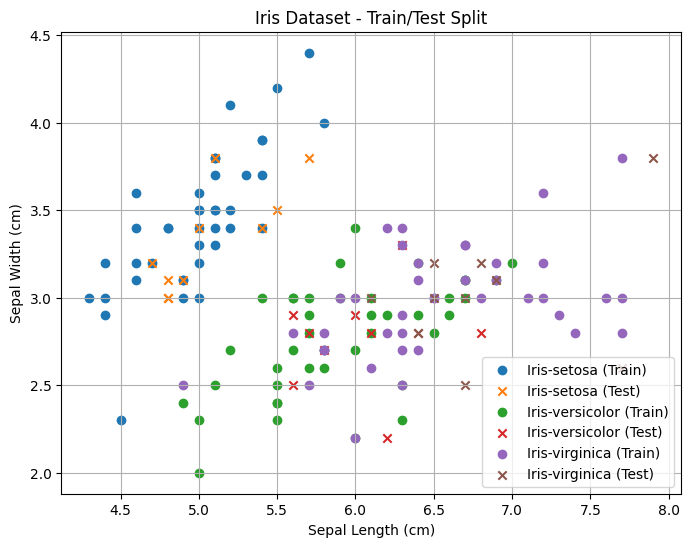

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from google.colab import drive
drive.mount('/content/drive')
# Load the Iris dataset from CSV
iris_df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/IRIS.csv")

# Separate features (X) and target variable (y)
X = iris_df[['sepal_length', 'sepal_width']]  # Changed column names
y = iris_df['species']
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Predict on the testing data
y_pred = knn.predict(X_test)

# Visualize the split
plt.figure(figsize=(8, 6))

# Plot both training and testing data
for species in iris_df['species'].unique():
    # Training data
    train_data = X_train[y_train == species]
    plt.scatter(train_data['sepal_length'], train_data['sepal_width'], label=f"{species} (Train)", marker='o')

    # Testing data
    test_data = X_test[y_test == species]
    plt.scatter(test_data['sepal_length'], test_data['sepal_width'], label=f"{species} (Test)", marker='x')


plt.title('Iris Dataset - Train/Test Split')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.grid(True)
plt.show()